In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,company_txt,job_simp,Job Description,Salary Estimate,Rating,Location,job_state,Size,Founded,Type of ownership,...,python_yn,sql_yn,excel_yn,aws_yn,spark_yn,nlp_yn,r studio_yn,job_sin,Company Name,Job Title
0,The Ohio State University Wexner Medical Center\n,na,Job Details\nJob Title\nResearch Scientist\n\n...,$42K-$92K\n(Glassdoor est.),3.9,"Columbus, OH",OH,10000+ Employees,1916,Hospital,...,0,0,0,0,0,0,0,na,The Ohio State University Wexner Medical Cente...,Research Scientist
1,"Upstart Network, Inc.\n",na,Upstart is a leading AI lending platform partn...,$54K-$111K\n(Glassdoor est.),4.5,"Columbus, OH",OH,201 to 500 Employees,2012,Company - Private,...,1,0,0,0,0,0,0,na,"Upstart Network, Inc.\n4.5",Research Scientist
2,International Business Machines Corporation\n,data scientist,"Introduction\nAs a Data Scientist at IBM, you ...",$54K-$89K\n(Glassdoor est.),3.8,"Columbus, OH",OH,10000+ Employees,1911,Company - Public,...,1,0,0,0,1,0,0,junior,International Business Machines Corporation\n3.8,Junior Data Scientist Apprenticeship
3,Berger Health System\n,data scientist,We are more than a health system. We are a bel...,$63K-$105K\n(Glassdoor est.),3.6,"Dublin, OH",OH,501 to 1000 Employees,-1,Hospital,...,1,1,1,0,0,0,0,na,Berger Health System\n3.6,Data Scientist
4,Olive\n,ML Engineer,Olive is healthcare's first intelligent digita...,$48K-$89K\n(Glassdoor est.),3.7,"Columbus, OH",OH,201 to 500 Employees,2012,Company - Private,...,1,1,0,0,0,0,0,na,Olive\n3.7,Machine Learning Engineer


In [4]:
df.job_simp.value_counts()

na                15
data scientist     9
data engineer      6
analyst            3
manager            1
ML Engineer        1
Name: job_simp, dtype: int64

In [5]:
df.min_degree.value_counts()

Bachelors    26
Masters       9
Name: min_degree, dtype: int64

In [6]:
#Job description Length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [7]:
#hourly wage to annual 
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis = 1)

In [9]:
df[df.hourly==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary


In [10]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n',''))

In [11]:
df.describe()

,Rating,Founded,hourly,employer provided,min_salary,max_salary,avg_salary,age,python_yn,sql_yn,excel_yn,aws_yn,spark_yn,nlp_yn,r studio_yn,desc_len
count,35.000000,35.000000,35.0,35.0,35.000000,35.000000,35.000000,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000,35.0,35.000000
mean,3.648571,1876.885714,0.0,0.0,71.000000,122.228571,96.614286,85.342857,0.542857,0.40000,0.485714,0.171429,0.142857,0.028571,0.0,4233.342857
std,0.339871,333.841612,0.0,0.0,32.661364,44.566596,38.052419,70.043660,0.505433,0.49705,0.507093,0.382385,0.355036,0.169031,0.0,1787.611797
min,3.200000,-1.000000,0.0,0.0,25.000000,60.000000,42.500000,-1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,1440.000000
25%,3.300000,1890.000000,0.0,0.0,48.000000,91.500000,70.500000,16.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,2949.000000
50%,3.700000,1929.000000,0.0,0.0,62.000000,115.000000,90.500000,91.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,3697.000000
75%,3.800000,1990.000000,0.0,0.0,90.500000,143.000000,116.500000,128.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.0,5373.500000
max,4.500000,2015.000000,0.0,0.0,144.000000,238.000000,189.000000,221.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.0,7706.000000


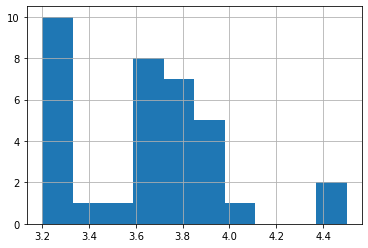

In [12]:
df.Rating.hist()

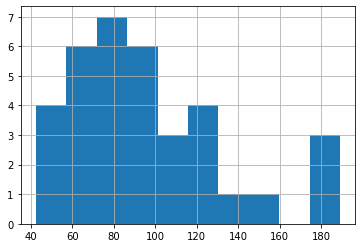

In [13]:
df.avg_salary.hist()

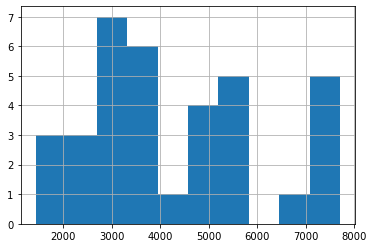

In [15]:
df.desc_len.hist()

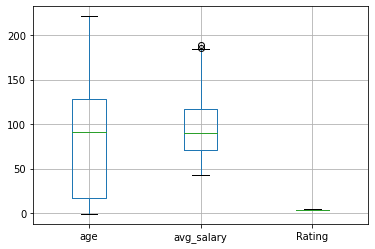

In [17]:
df.boxplot(column = ['age','avg_salary', 'Rating'])

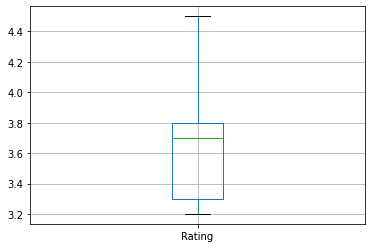

In [18]:
df.boxplot(column = 'Rating')

In [19]:
df[['age','avg_salary', 'Rating', 'desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.244425,0.070073,0.398315
avg_salary,0.244425,1.000000,0.026052,0.042692
Rating,0.070073,0.026052,1.000000,-0.229718
desc_len,0.398315,0.042692,-0.229718,1.000000


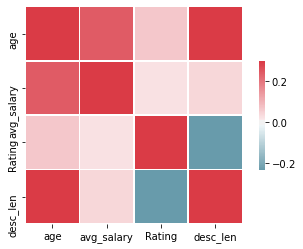

In [26]:
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(df[['age','avg_salary', 'Rating', 'desc_len']].corr(),vmax =.3, center = 0, cmap=cmap,
            square=True, linewidth=.5, cbar_kws={"shrink": .5})

In [27]:
df.columns

Index(['company_txt', 'job_simp', 'Job Description', 'Salary Estimate',
       'Rating', 'Location', 'job_state', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly',
       'employer provided', 'min_salary', 'max_salary', 'avg_salary',
       'min_degree', 'age', 'python_yn', 'sql_yn', 'excel_yn', 'aws_yn',
       'spark_yn', 'nlp_yn', 'r studio_yn', 'job_sin', 'Company Name',
       'Job Title', 'desc_len'],
      dtype='object')

In [29]:
df_cat = df[['Industry','Revenue','company_txt','python_yn', 'sql_yn', 'excel_yn', 'aws_yn',
       'spark_yn','job_simp','job_sin','min_degree',]]

Graph for Industry: total =13


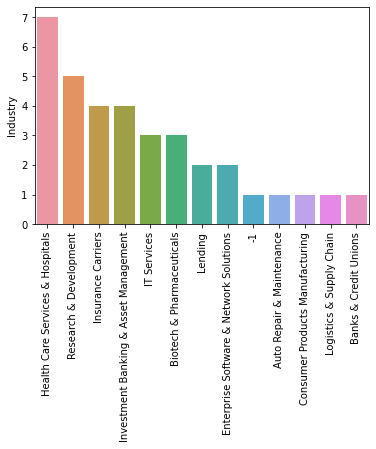

Graph for Revenue: total =8


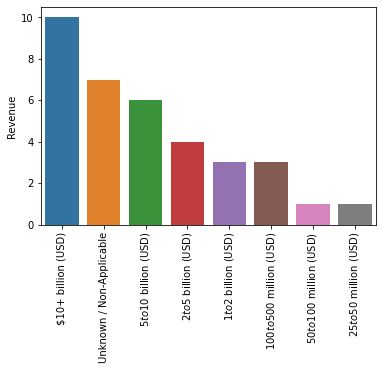

Graph for company_txt: total =19


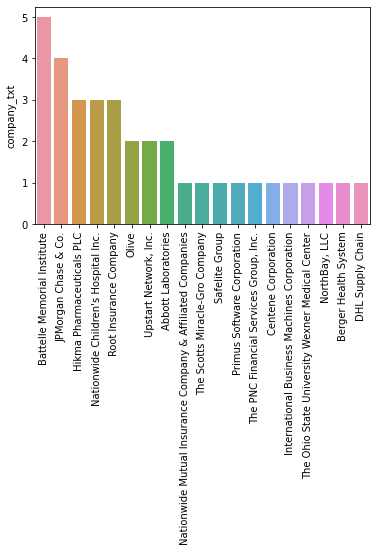

Graph for python_yn: total =2


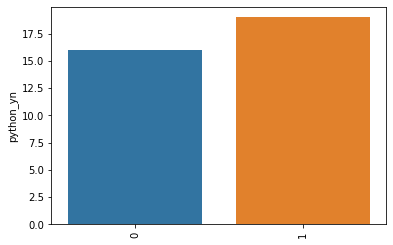

Graph for sql_yn: total =2


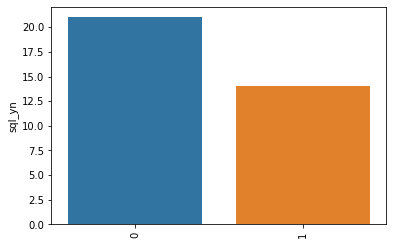

Graph for excel_yn: total =2


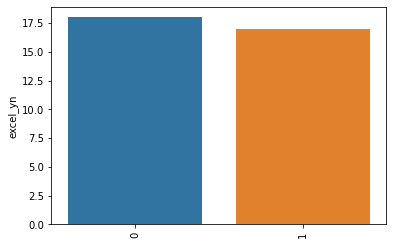

Graph for aws_yn: total =2


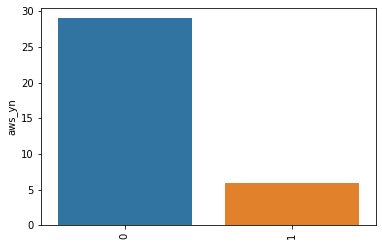

Graph for spark_yn: total =2


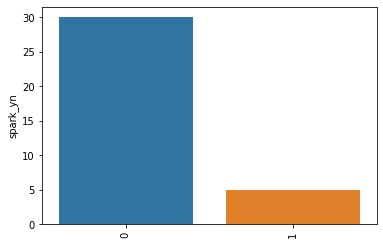

Graph for job_simp: total =6


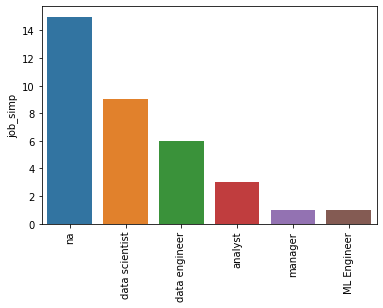

Graph for job_sin: total =3


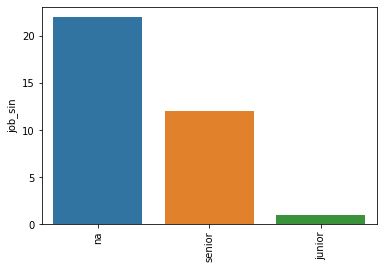

Graph for min_degree: total =2


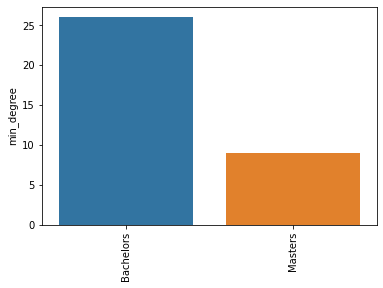

In [33]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s: total =%d" %(i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.show()

In [35]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
ML Engineer,68.500000
analyst,64.166667
data engineer,92.916667
data scientist,124.666667
manager,66.500000
na,91.633333


In [37]:
pd.pivot_table(df, index = ['job_simp','job_sin'], values = 'avg_salary')

avg_salary
job_simp       job_sin            
ML Engineer    na        68.500000
analyst        na        64.166667
data engineer  na        82.250000
               senior   114.250000
data scientist junior    71.500000
               na       107.375000
               senior   155.250000
manager        na        66.500000
na             na        76.777778
               senior   113.916667

In [38]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

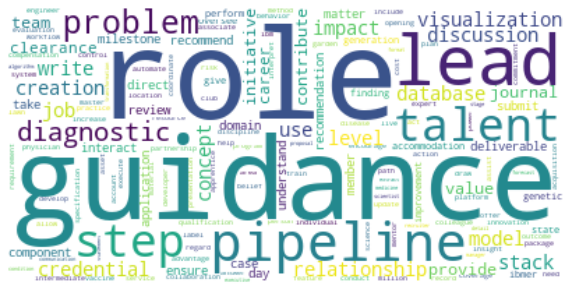

In [42]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    #remove punctuation and stop words#
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered
words_filtered = punctuation_stop(words)

text = " ".join({ele for ele in words_filtered})

wc = WordCloud(background_color = "white", max_words = 2000, max_font_size=90, random_state=1, stopwords=STOPWORDS)
wc.generate(text)


plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()